In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
df.head(3)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0


## borrar columnas innecesarias

In [4]:
df.columns

Index([u'id', u'titulo', u'descripcion', u'tipodepropiedad', u'direccion',
       u'ciudad', u'provincia', u'antiguedad', u'habitaciones', u'garages',
       u'banos', u'metroscubiertos', u'metrostotales', u'idzona', u'lat',
       u'lng', u'fecha', u'gimnasio', u'usosmultiples', u'piscina',
       u'escuelascercanas', u'centroscomercialescercanos', u'precio'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [12]:
def factorize_columns(data,columns,removecolumns=[]):
    df = data.drop(removecolumns,axis=1)
    df[columns] = df[columns].apply(lambda x: pd.factorize(x)[0])
    return df
remove = ['titulo','descripcion','fecha']
fact = ['tipodepropiedad','direccion','ciudad','provincia']
data = factorize_columns(df,fact,remove)


In [13]:
data.head(3)

,id,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,0,0,0,0,NaN,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,1,1,1,0,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,19.310205,-99.227655,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,2,2,2,1,5.0,3.0,2.0,2.0,144.0,166.0,48551.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1200000.0


In [17]:
data.to_csv('data.csv')

In [15]:
import seaborn as sns
pd.options.display.max_columns = 500 # this will set limit of columns to 500
data.corr()

,id,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,1.000000,-0.001641,-0.000615,-0.004300,-0.000905,0.002696,-0.002220,-0.001893,-0.001941,0.000280,0.001804,0.003623,-0.000239,0.001511,0.000696,-0.000257,-0.001543,-0.004014,-0.002146,-0.000889
tipodepropiedad,-0.001641,1.000000,-0.006137,0.138210,0.153729,0.043482,0.245862,-0.117261,0.081069,0.200313,0.195187,-0.084163,0.110828,-0.022934,-0.118806,-0.109362,-0.090827,-0.086761,-0.091397,-0.002439
direccion,-0.000615,-0.006137,1.000000,0.035855,-0.085219,0.053335,0.003371,-0.049908,-0.078695,-0.062842,-0.078278,-0.005906,-0.051982,-0.048578,0.031030,0.058549,0.045090,0.222876,0.232784,-0.050156
ciudad,-0.004300,0.138210,0.035855,1.000000,0.304930,-0.056889,0.000346,-0.101235,-0.111844,-0.063073,-0.058200,-0.128423,0.060925,-0.015855,-0.046985,-0.050258,-0.002893,-0.022163,-0.043548,-0.185793
provincia,-0.000905,0.153729,-0.085219,0.304930,1.000000,-0.220200,0.029000,-0.003743,-0.004941,0.016973,0.058265,-0.148669,0.437593,-0.107812,-0.053313,-0.083341,0.034773,-0.086749,-0.122787,-0.264061
antiguedad,0.002696,0.043482,0.053335,-0.056889,-0.220200,1.000000,0.159373,-0.078656,-0.063351,0.077990,0.044821,0.030616,-0.101883,0.008250,-0.106388,-0.095266,-0.136524,-0.005126,-0.009686,0.073097
habitaciones,-0.002220,0.245862,0.003371,0.000346,0.029000,0.159373,1.000000,0.243112,0.489695,0.517499,0.367938,-0.047764,-0.007486,0.007764,-0.030025,-0.005873,-0.012056,0.018928,0.000925,0.251014
garages,-0.001893,-0.117261,-0.049908,-0.101235,-0.003743,-0.078656,0.243112,1.000000,0.435112,0.379190,0.235931,-0.018294,0.005892,-0.000294,0.122430,0.131324,0.117440,0.084461,0.075237,0.348543
banos,-0.001941,0.081069,-0.078695,-0.111844,-0.004941,-0.063351,0.489695,0.435112,1.000000,0.683101,0.543252,-0.002771,-0.054064,0.060019,0.083278,0.097835,0.127115,-0.021811,-0.027297,0.534060
metroscubiertos,0.000280,0.200313,-0.062842,-0.063073,0.016973,0.077990,0.517499,0.379190,0.683101,1.000000,0.734490,-0.047889,-0.018422,0.046043,0.032568,0.045425,0.062742,-0.026743,-0.046432,0.629187


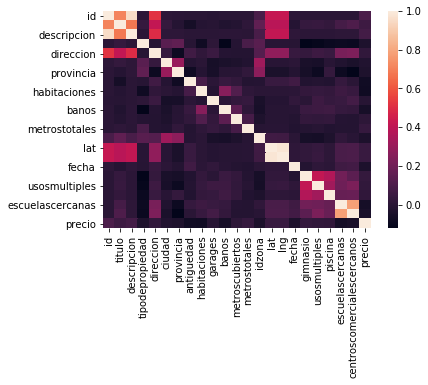

In [20]:
sns.heatmap(t)